# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
display(combined_df.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_df[combined_df["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df["Mouse ID"].isin(duplicate_mice)].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice in the clean DataFrame.
new_count = clean_df["Mouse ID"].nunique()
new_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

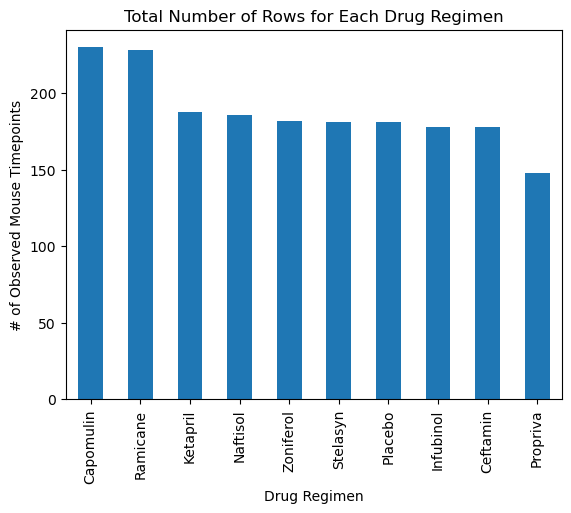

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = clean_df["Drug Regimen"].value_counts()
mouse_counts.plot(kind="bar", title="Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

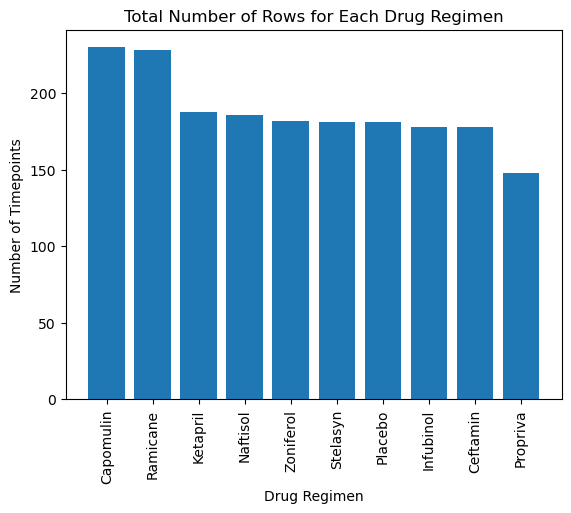

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_counts.index, mouse_counts.values)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()


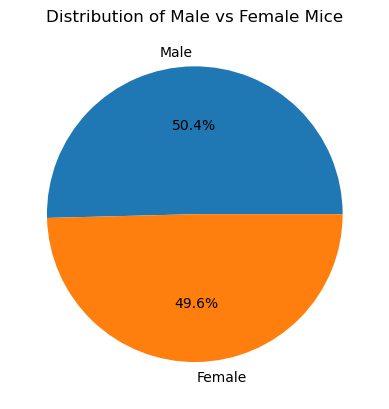

In [28]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Male vs Female Mice")
plt.ylabel("")
plt.show()

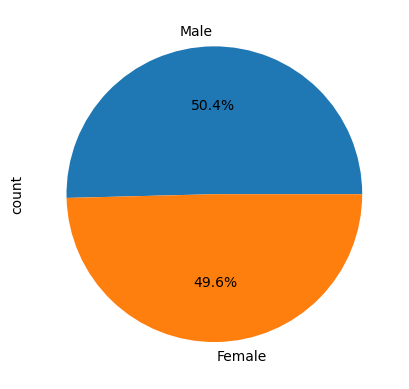

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = last_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


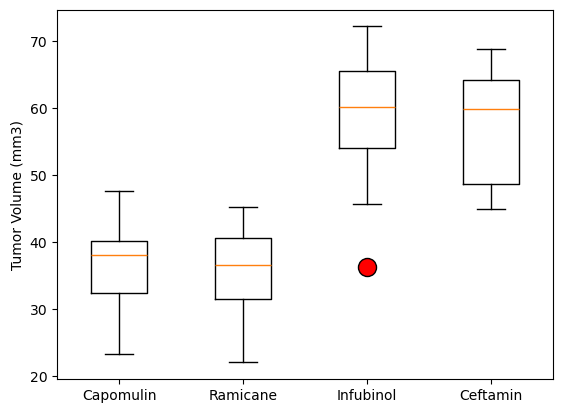

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='red', markersize=13))
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

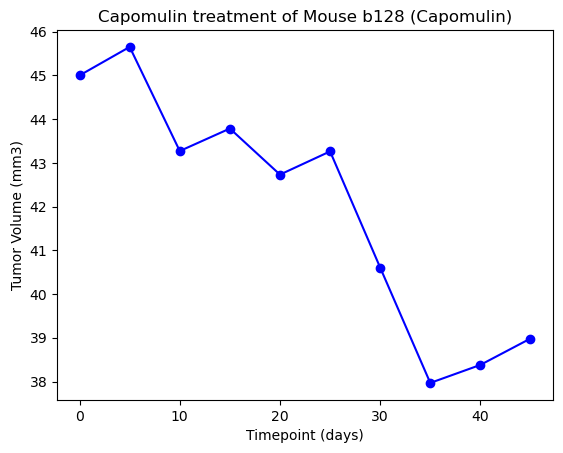

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Mouse ID"].iloc[0]
mouse_data = clean_df.loc[clean_df["Mouse ID"] == mouse_id]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')
plt.title(f"Capomulin treatment of Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


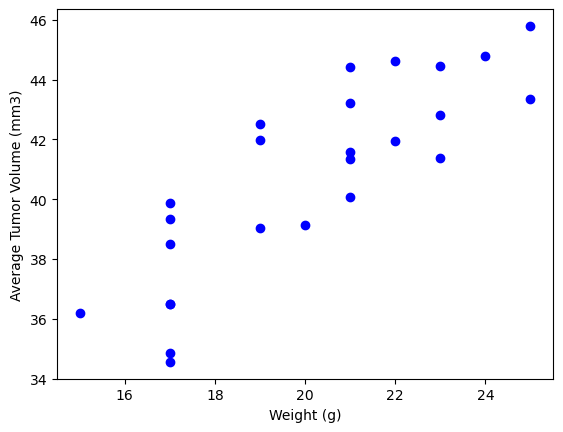

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color='b')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


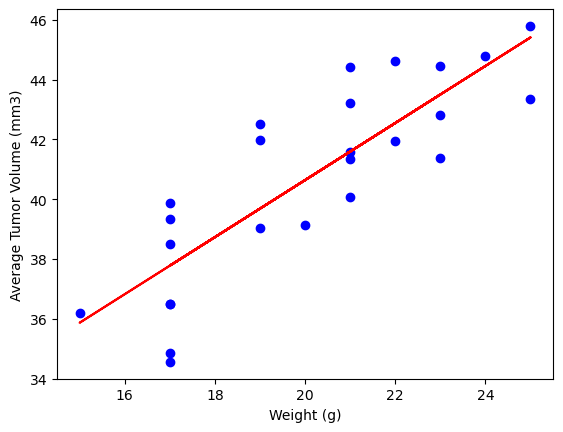

In [64]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
regression_line = slope * avg_tumor_volume["Weight (g)"] + intercept

plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color='b')
plt.plot(avg_tumor_volume["Weight (g)"], regression_line, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
